In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import (
    train_test_split,
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score

df = pd.read_csv(
    r"/home/ahmed/Feature-engineering/DataSets/train.csv",
    usecols=["Age", "Fare", "Survived"],
)
df.head()
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [19]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [20]:
features, test = df[["Age", "Fare"]], df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(
    features, test, test_size=0.2, random_state=0
)
x_train

,Age,Fare
140,29.699118,15.2458
439,31.000000,10.5000
817,31.000000,37.0042
378,20.000000,4.0125
491,21.000000,7.2500
...,...,...
835,39.000000,83.1583
192,19.000000,7.8542
629,29.699118,7.7333
559,36.000000,17.4000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


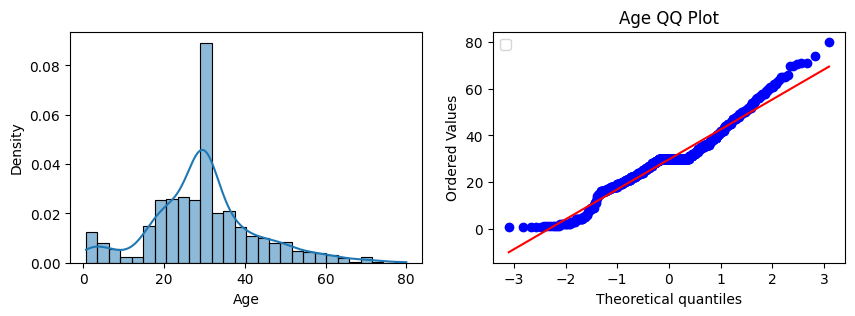

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(data=x_train, x="Age", kde=1, ax=axs[0], stat="density")
axs[0].set_label("Age Distibution")

stats.probplot(
    x_train["Age"],
    dist="norm",
    plot=plt,
)
plt.title("Age QQ Plot")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


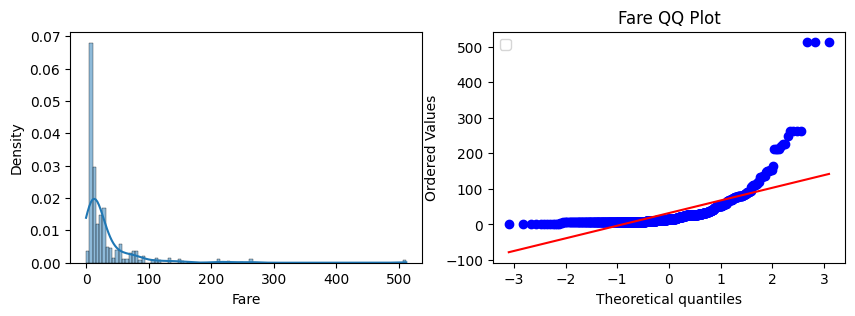

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(data=x_train, x="Fare", kde=1, ax=axs[0], stat="density")
axs[0].set_label("Fare Distibution")

stats.probplot(
    x_train["Fare"],
    dist="norm",
    plot=plt,
)
plt.title("Fare QQ Plot")
plt.legend()
plt.show()

In [23]:
LG = LogisticRegression()
DTS = DecisionTreeClassifier()
LG.fit(X=x_train, y=y_train)
DTS.fit(X=x_train, y=y_train)
LogisticRegression_pred = LG.predict(x_test)
DecisionTreeClassifier_pred = DTS.predict(x_test)
print(
    "LogisticRegression score = ",
    accuracy_score(y_true=y_test, y_pred=LogisticRegression_pred) * 100,
    " % ",
)
print(
    "DecisionTreeClassifier score = ",
    accuracy_score(y_true=y_test, y_pred=DecisionTreeClassifier_pred) * 100,
    " % ",
)

LogisticRegression score =  69.83240223463687  % 
DecisionTreeClassifier score =  67.0391061452514  % 


In [24]:
Transformer = FunctionTransformer(func=np.sqrt)
X_train_transformed = Transformer.fit_transform(x_train)

Transformer = FunctionTransformer(func=np.sqrt)
X_test_transformed = Transformer.fit_transform(x_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


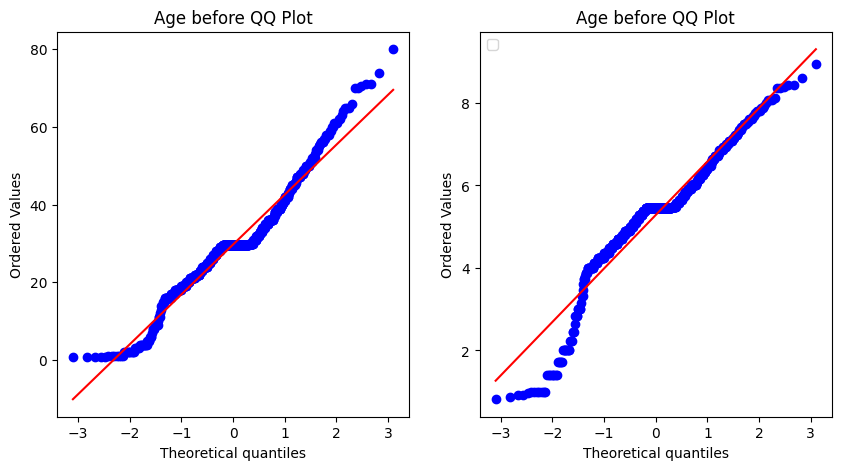

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(121)

stats.probplot(
    x_train["Age"],
    dist="norm",
    plot=plt,
)
plt.title("Age before QQ Plot")
plt.subplot(122)

stats.probplot(
    X_train_transformed["Age"],
    dist="norm",
    plot=plt,
)
plt.title("Age before QQ Plot")

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


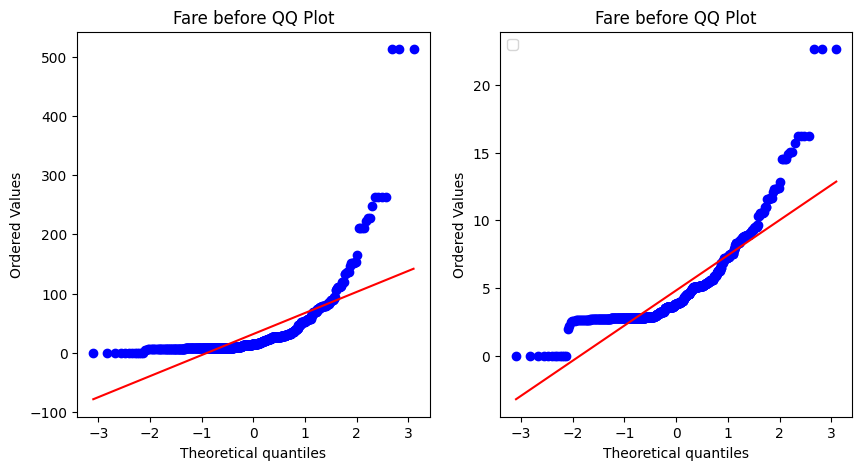

In [26]:
plt.figure(figsize=(10, 5))

plt.subplot(121)

stats.probplot(
    x_train["Fare"],
    dist="norm",
    plot=plt,
)
plt.title("Fare before QQ Plot")
plt.subplot(122)

stats.probplot(
    X_train_transformed["Fare"],
    dist="norm",
    plot=plt,
)
plt.title("Fare before QQ Plot")

plt.legend()
plt.show()

In [27]:
LG = LogisticRegression()
DTS = DecisionTreeClassifier()
LG.fit(X=X_train_transformed, y=y_train)
DTS.fit(X=X_train_transformed, y=y_train)
LogisticRegression_pred = LG.predict(X_test_transformed)
DecisionTreeClassifier_pred = DTS.predict(X_test_transformed)
print(
    "LogisticRegression score = ",
    accuracy_score(y_true=y_test, y_pred=LogisticRegression_pred) * 100,
    " % ",
)
print(
    "DecisionTreeClassifier score = ",
    accuracy_score(y_true=y_test, y_pred=DecisionTreeClassifier_pred) * 100,
    " % ",
)

LogisticRegression score =  69.27374301675978  % 
DecisionTreeClassifier score =  67.0391061452514  % 
